## Wine Quality prediction with the help of Linear Regression
- In this notebook, we will use data of red wine to predict the quality of wine. As a first step to start we will find the co-relation between different feature. We will use most effective features for Linear Regression to predict wine quality.
- As a perfomance matrix we will look at the R - squared, Adjusted R-squared and accuracy of model.

In [205]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(caret)
library(corrgram) # Correlograms http://www.datavis.ca/papers/corrgram.pdf
library(car) #required for nearest neighbors
library(FNN) # nearest neighbors techniques
library(pROC) # to make ROC curve
library(corrplot)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")
# Any results you write to the current directory are saved as output.

## Load Data

In [206]:
wd <- read.csv("../input/winequality-red.csv", sep=",")
wd

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5


In [207]:
summary(wd$quality)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   5.636   6.000   8.000 

In [208]:
print("Quality type with data point count.")
table(wd$quality)


[1] "Quality type with data point count."



  3   4   5   6   7   8 
 10  53 681 638 199  18 

##  correlation between features

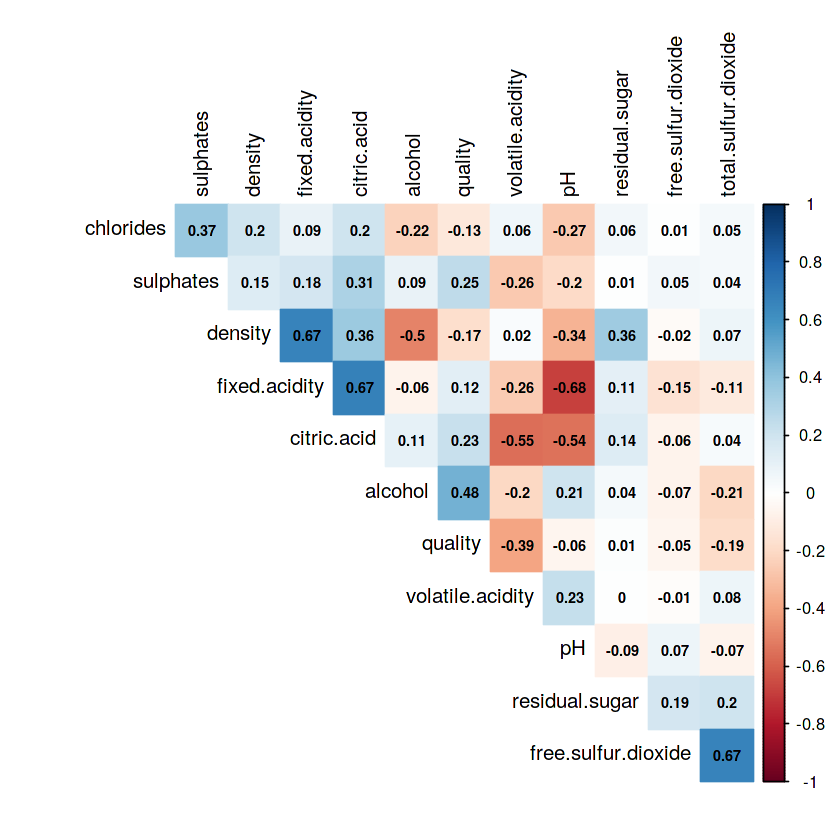

In [209]:
M<-cor(wd)
ccol <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(M, method = "color",
         type = "upper", order = "hclust", number.cex = .7,
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 90, # Text label color and rotation
         diag = FALSE) 

#### Observation: By looking at the correlation matrix we can take alcohol, volatile.acidity, citric.acid and, sulphates for linear regression model and check the R squared and Adjusted R squared by different combination of selected features.

In [210]:
linear_quality_1 = lm(quality ~ alcohol, data = wd)
summary(linear_quality_1)



Call:
lm(formula = quality ~ alcohol, data = wd)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8442 -0.4112 -0.1690  0.5166  2.5888 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.87497    0.17471   10.73   <2e-16 ***
alcohol      0.36084    0.01668   21.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7104 on 1597 degrees of freedom
Multiple R-squared:  0.2267,	Adjusted R-squared:  0.2263 
F-statistic: 468.3 on 1 and 1597 DF,  p-value: < 2.2e-16


In [211]:
linear_quality_4 = lm(quality ~ alcohol + volatile.acidity + citric.acid + sulphates, data = wd)
summary(linear_quality_4)



Call:
lm(formula = quality ~ alcohol + volatile.acidity + citric.acid + 
    sulphates, data = wd)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.71408 -0.38590 -0.06402  0.46657  2.20393 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.64592    0.20106  13.160  < 2e-16 ***
alcohol           0.30908    0.01581  19.553  < 2e-16 ***
volatile.acidity -1.26506    0.11266 -11.229  < 2e-16 ***
citric.acid      -0.07913    0.10381  -0.762    0.446    
sulphates         0.69552    0.10311   6.746 2.12e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6588 on 1594 degrees of freedom
Multiple R-squared:  0.3361,	Adjusted R-squared:  0.3345 
F-statistic: 201.8 on 4 and 1594 DF,  p-value: < 2.2e-16


#### Observation: Coefficients matrix indicates alcohol, volatile.acidity and sulphates as highly significant features and citric.acid as insignificant feature. so we will remove citric.acid from our model.  

In [212]:
linear_quality_5 = lm(quality ~ alcohol + volatile.acidity + sulphates, data = wd)
summary(linear_quality_5)


Call:
lm(formula = quality ~ alcohol + volatile.acidity + sulphates, 
    data = wd)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7186 -0.3820 -0.0641  0.4746  2.1807 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.61083    0.19569  13.342  < 2e-16 ***
alcohol           0.30922    0.01580  19.566  < 2e-16 ***
volatile.acidity -1.22140    0.09701 -12.591  < 2e-16 ***
sulphates         0.67903    0.10080   6.737 2.26e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6587 on 1595 degrees of freedom
Multiple R-squared:  0.3359,	Adjusted R-squared:  0.3346 
F-statistic: 268.9 on 3 and 1595 DF,  p-value: < 2.2e-16


#### This model did not improve much from previous model, but it removed one unnecessary parameter. Now it got all the parameter which are very significant to it.

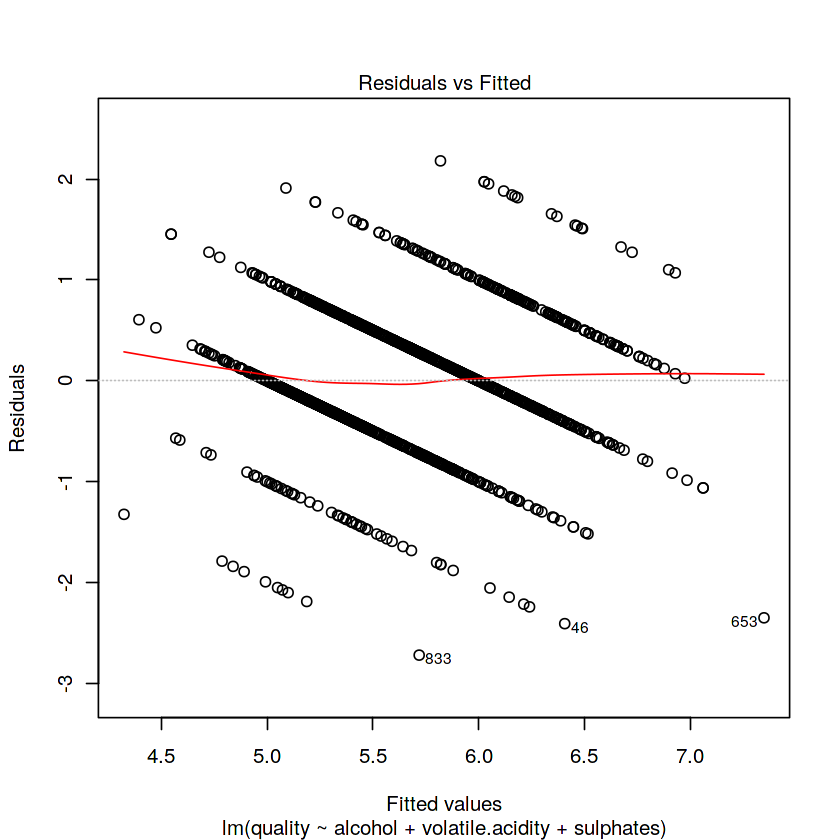

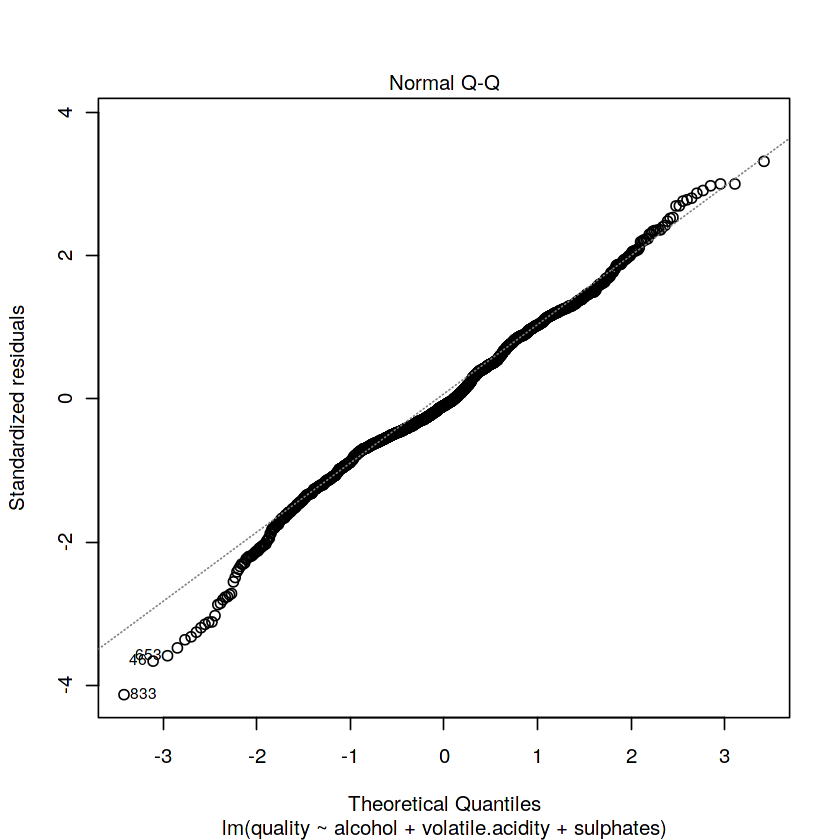

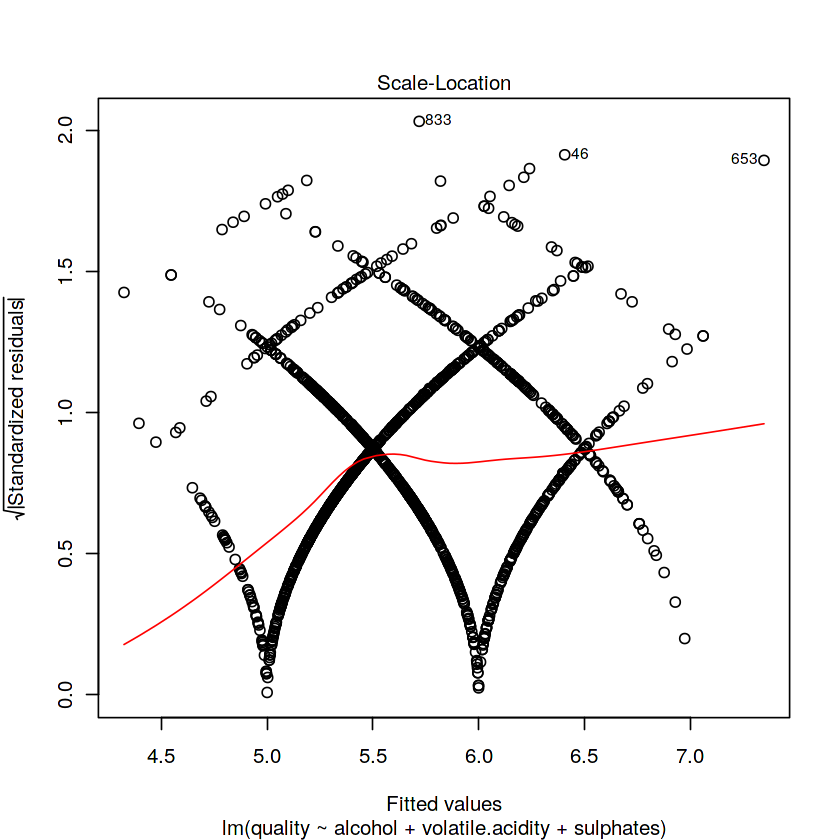

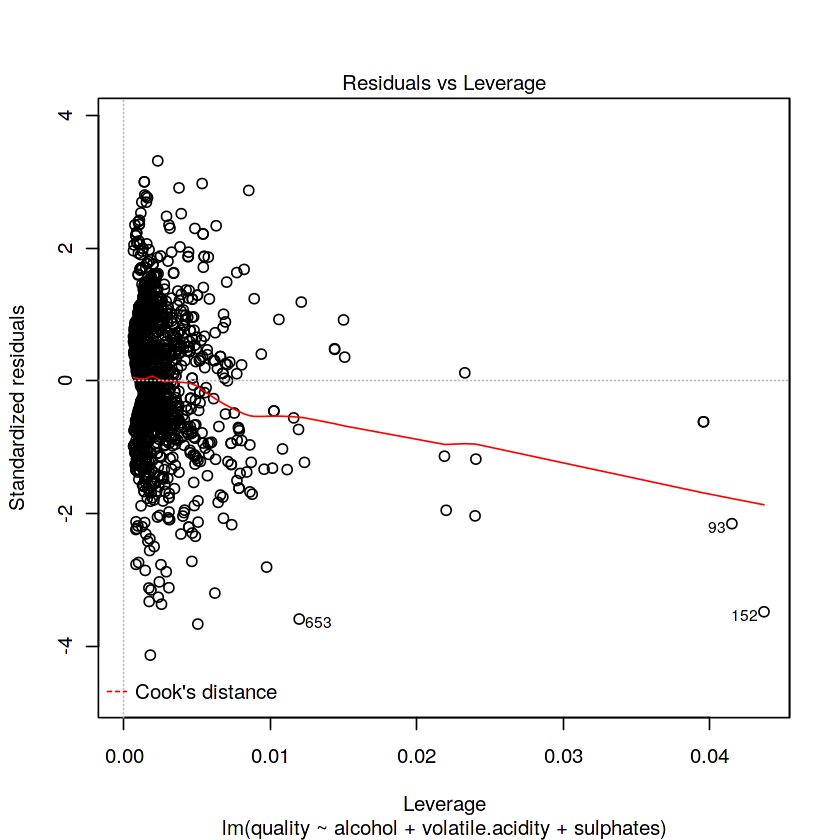

In [213]:
plot(linear_quality_5)

#### Observation: The above residual plot shows that the data was fit for linear regression model. It in homoscedasticity and does not cross to cook’s distance line.

## Apply Linear Regression Model 
### Split data into Training and Test Data

In [214]:
set.seed(2018)
train.size <- 0.8 
train.index <- sample.int(length(wd$quality), round(length(wd$quality) * train.size))
train.sample <- wd[train.index,]
test.sample <- wd[-train.index,]



In [215]:
lm = lm(quality ~ alcohol + volatile.acidity + sulphates, data = train.sample)
results = round(predict(lm, newdata=test.sample))


In [216]:
confusionMatrix(results, test.sample$quality)

Warning message in confusionMatrix.default(results, test.sample$quality):
“Levels are not in the same order for reference and data. Refactoring data to match.”

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   1  12  87  32   0   0
         6   0   4  41 101  28   2
         7   0   0   2   3   6   1
         8   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.6062          
                 95% CI : (0.5504, 0.6601)
    No Information Rate : 0.425           
    P-Value [Acc > NIR] : 5.37e-11        
                                          
                  Kappa : 0.3379          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity          0.000000     0.00   0.6692   0.7426  0.17647 0.000000
Specificity          1.000000     1.00   0.7632   0.5924  0.97902 1.000000
Pos Pred Value            NaN      NaN   0.6591   0.5739  0.50000      NaN
Neg Pred Value 

## Linear regression model is getting accuracy of 60%. 